In [16]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [17]:
def read(filename):
    f = open(filename)
    raw = f.readlines()
    f.close()
    errors = set()
    err = 0
    k = ''

    data = {'No loss':[],'ADS-B':[],'Wi-Fi':[]}

    rates = set()

    for line in raw:
        ls = line.split()
        if "Error" in ls[0]:
            err = float(ls[1])
            if err < 0:
                err = 0
            continue

        if 'No' in ls[0] or 'ADS-B' in ls[0] or 'Wi-Fi' in ls[0]:
            k = ' '.join(ls)
            continue
        rates.add(float(ls[0]))
        data[k].append(float(ls[1]))
    r = list(rates)
    r.sort()
    return data, r


In [18]:
d,r = read('results_2d.txt')

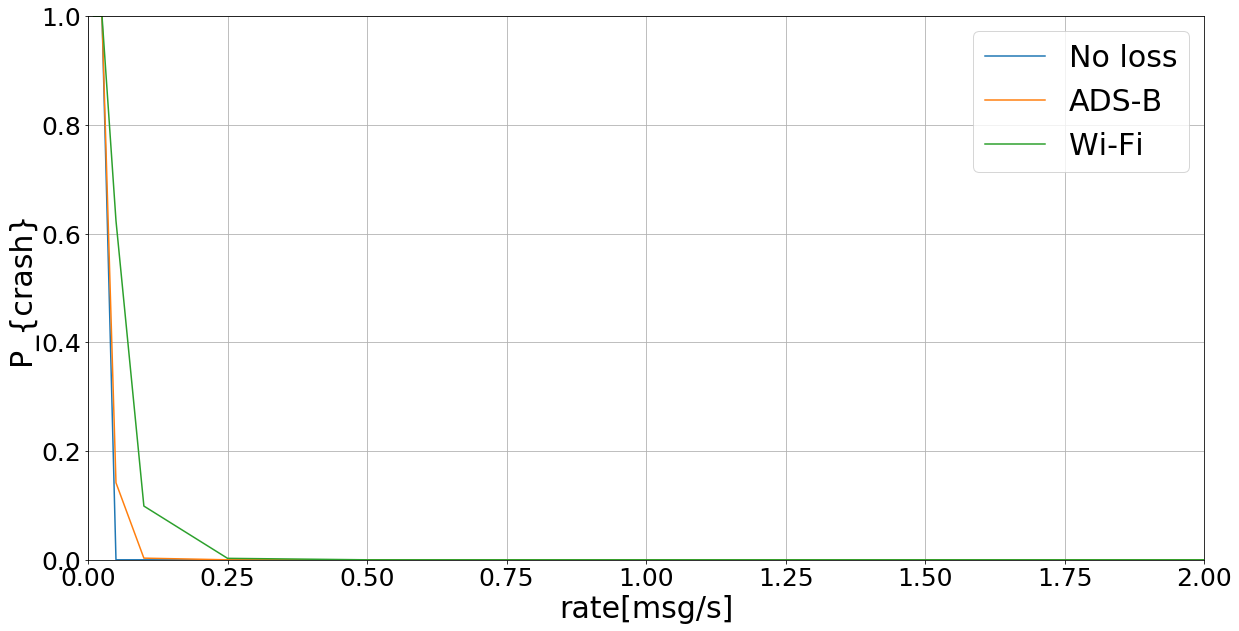

In [22]:
nlp = d['No loss'][0:len(r)]
adp = d['ADS-B'][0:len(r)]
wip = d['Wi-Fi'][0:len(r)]
plt.plot(r,nlp, label='No loss')
plt.plot(r,adp, label='ADS-B')
plt.plot(r,wip, label='Wi-Fi')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('P_{crash}',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,2,0,1])
plt.show()